In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm','petal_width_in_cm','class']

In [3]:
data.head(2)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_in_cm    150 non-null float64
sepal_width_in_cm     150 non-null float64
petal_length_in_cm    150 non-null float64
petal_width_in_cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
#dicto = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
#data['class'] = data['class'].map(dicto)

In [6]:
data.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_in_cm    150 non-null float64
sepal_width_in_cm     150 non-null float64
petal_length_in_cm    150 non-null float64
petal_width_in_cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<Figure size 1440x1080 with 0 Axes>

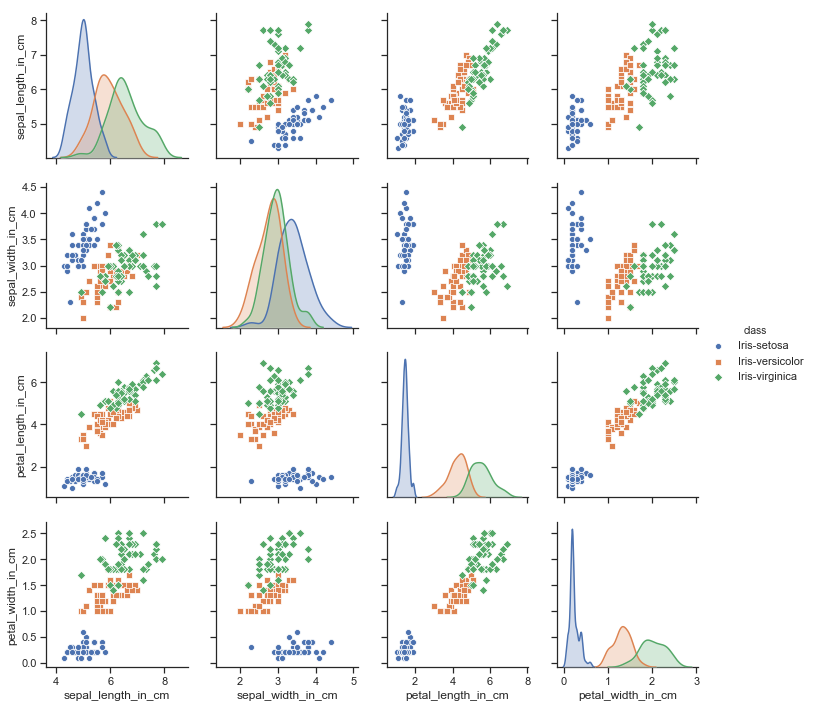

In [8]:
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(20,15)) 
g = sns.pairplot(data, hue="class", markers=["o", "s", "D"])

In [9]:
data.corr()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
sepal_length_in_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_in_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_in_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_in_cm,0.817954,-0.356544,0.962757,1.000000


In [10]:
dicto = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data['class'] = data['class'].map(dicto)
data.corr()['class']

sepal_length_in_cm    0.782561
sepal_width_in_cm    -0.419446
petal_length_in_cm    0.949043
petal_width_in_cm     0.956464
class                 1.000000
Name: class, dtype: float64

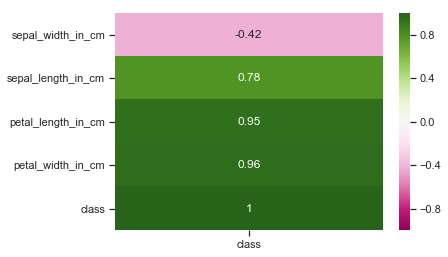

In [11]:
df = pd.DataFrame(data.corr()['class'].sort_values())
sns.heatmap(df,cbar=True,annot=True,vmax=1,vmin=-1,cmap='PiYG')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'],axis=1), data['class'], test_size=0.45, random_state=101)

In [13]:
classif = MultinomialNB()
classif.fit(X_train,y_train)
pred = classif.predict(X_test)
print(accuracy_score(y_test,pred))

0.5735294117647058


In [14]:
classif = SVC()
classif.fit(X_train,y_train)
pred = classif.predict(X_test)
print(accuracy_score(y_test,pred))

0.9852941176470589


In [15]:
del(X_test,X_train,y_train,y_test,classif,pred,data,df,dicto)
import gc
gc.collect()

608